In [1]:
using PyPlot, LinearAlgebra, Random

In [2]:
# Ordinary least squares regression
function OLSRegGradientDescent(X, y, initθ; lr=1e-4, num_iters=10000)
    θ = initθ
    for i in 1:num_iters
        ŷ = X * θ # predictions
        δ = y - ŷ  # error
        θ += lr * X' * δ # Update
    end
    return θ
end;

In [3]:
# Generate Toy datas
num_train, num_test = 100, 500 # sample size
dims = 4 # dimensions
Random.seed!(0);

x = rand(num_train) #range(0.1, 0.9, length=num_train)
y =  sin.(2π*x) + 0.3randn(num_train);
X = hcat([x .^ p for p in 0:dims-1]...); # design matrix

xtest = range(0, 1, length=num_test)
ytest =  sin.(2π*xtest)
Xtest =hcat([xtest .^ p for p in 0:dims-1]...);

In [4]:
# Gradient descent
initθ = zeros(dims) # init variables
θgd = OLSRegGradientDescent(X, y, initθ, lr=1e-2, num_iters=1e5)
ŷgd = Xtest * θgd; # predictions

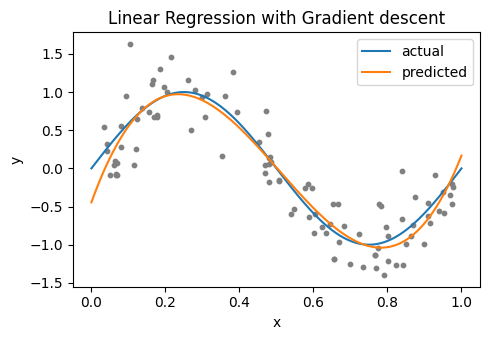

In [5]:
figure(figsize=(5,3.5))
title("Linear Regression with Gradient descent")
scatter(x, y, color="gray", s=10) # samples
plot(xtest, ytest, label="actual")  # regression line
plot(xtest, ŷgd, label="predicted")  # regression line
xlabel("x"); ylabel("y"); legend()
tight_layout()

In [6]:
θne = (X' * X) \ X' * y
ŷne = Xtest * θne; # predictions

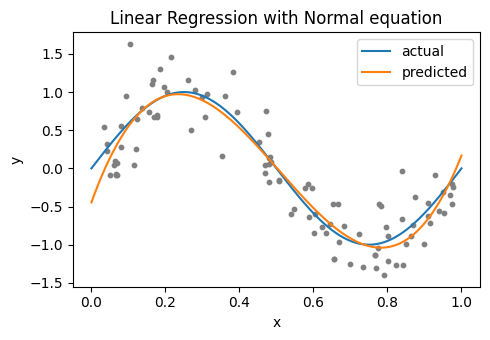

In [7]:
figure(figsize=(5,3.5))
title("Linear Regression with Normal equation")
scatter(x, y, color="gray", s=10) # samples
plot(xtest, ytest, label="actual")  # regression line
plot(xtest, ŷne, label="predicted")  # regression line
xlabel("x"); ylabel("y"); legend()
tight_layout()